In [1]:
import os
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

C:\Users\shrut\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\shrut\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\shrut\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\shrut\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training_arrays_v1.py:37: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.0)
  from scipy.sparse import issparse  # pylint: disable=g-import-not-at-top


## Uploading the Dataset

In [2]:
# Define the path to the main dataset folder
dataset_path = "C:/Users/shrut/OneDrive/Desktop/CNN letter Dataset"

# Create empty lists to store images and labels
images = []
labels = []

In [3]:
# Iterate over each subfolder (0–9)
for label in range(10):
    folder_path = os.path.join(dataset_path, str(label))
    
    # Check if the path exists to avoid errors
    if os.path.exists(folder_path):
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            
            # Read the image in grayscale 
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            
            if img is not None:
                images.append(img)
                labels.append(label)

In [4]:
# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

print("Number of images loaded:", len(images))
print("Number of labels loaded:", len(labels))

Number of images loaded: 10300
Number of labels loaded: 10300


## CNN model 

In [5]:
# Reshape images and normalize
images = images.reshape(-1, images.shape[1], images.shape[2], 1).astype('float32') / 255.0
labels = to_categorical(labels, 10)  # Convert labels to one-hot encoding

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [6]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(images.shape[1], images.shape[2], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),# dividing the input into smaller region
    Flatten(),#multidimentional into single dimention vector
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)

C:\Users\shrut\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 38s 177ms/step - accuracy: 0.5413 - loss: 1.3509 - val_accuracy: 0.9727 - val_loss: 0.1233
Epoch 2/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 44s 191ms/step - accuracy: 0.9389 - loss: 0.2192 - val_accuracy: 0.9891 - val_loss: 0.0444
Epoch 3/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 39s 191ms/step - accuracy: 0.9559 - loss: 0.1405 - val_accuracy: 0.9939 - val_loss: 0.0240
Epoch 4/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 39s 191ms/step - accuracy: 0.9716 - loss: 0.0935 - val_accuracy: 0.9891 - val_loss: 0.0292
Epoch 5/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 38s 184ms/step - accuracy: 0.9748 - loss: 0.0739 - val_accuracy: 0.9951 - val_loss: 0.0179
Epoch 6/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 38s 182ms/step - accuracy: 0.9789 - loss: 0.0585 - val_accuracy: 0.9964 - val_loss: 0.0115
Epoch 7/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 39s 187ms/step - accuracy: 0.9839 - loss: 0.0520 - val_accuracy: 0.9988 - val_loss: 0.0060
Epoch 8/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 39s 188ms/step - accuracy: 0.9879 - loss: 0

## Accuracy - 0.9961165189743042

### Image processing technique

### Edge Detection

Edge detected images shape: (10300, 28, 28)


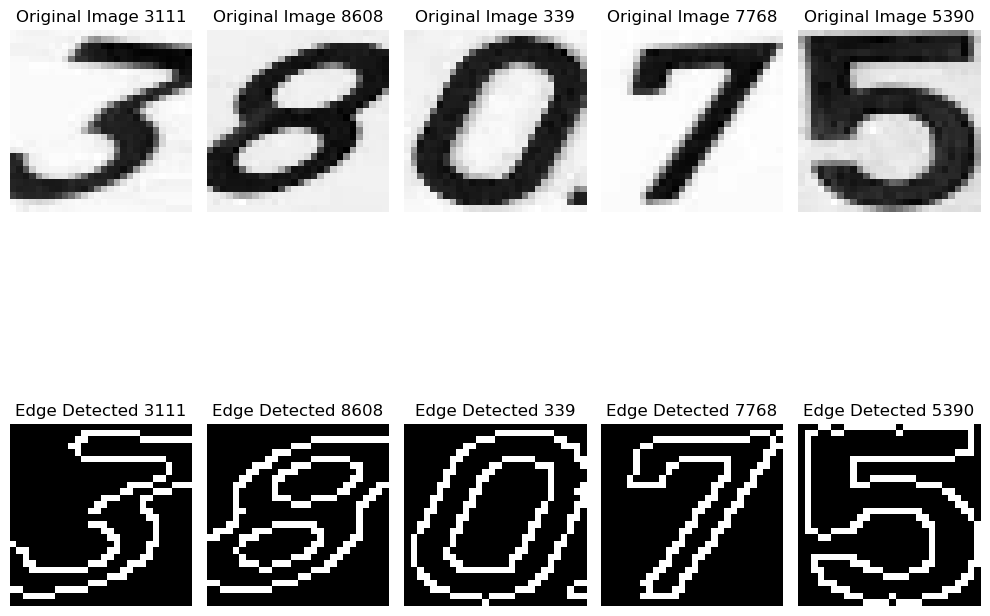

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Function to apply edge detection using the Canny algorithm
def apply_edge_detection(images, lower_threshold=100, upper_threshold=200):
    edges_detected = []
    
    for img in images:
        # Convert the image to uint8 and apply Canny edge detection
        img_uint8 = (img * 255).astype(np.uint8)  # Rescale to 0-255 and convert to uint8
        edges = cv2.Canny(img_uint8, lower_threshold, upper_threshold)
        edges_detected.append(edges)
    
    return np.array(edges_detected)

# Apply edge detection on the images
edges_images = apply_edge_detection(images_resized)

# Print the shape to confirm the size
print("Edge detected images shape:", edges_images.shape)

# Function to visualize the images (original vs edge detected)
def visualize_images_before_after(original_images, edge_images, num_images=5):
    # Randomly sample `num_images` from the dataset to display images from different folders
    indices = random.sample(range(len(original_images)), num_images)
    
    plt.figure(figsize=(10, 2 * num_images))
    
    # Loop through the selected `num_images` and display them
    for i, index in enumerate(indices):
        # Original Image
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original_images[index], cmap='gray')
        plt.title(f"Original Image {index + 1}", fontsize=12)
        plt.axis('off')
        
        # Edge Detected Image
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(edge_images[index], cmap='gray')
        plt.title(f"Edge Detected {index + 1}", fontsize=12)
        plt.axis('off')
    
    plt.tight_layout()  # Adjust layout to make sure the images fit well
    plt.show()

# Visualize the first few images before and after edge detection with a custom number of images
num_images_to_show = 5  # Change this number to show more or fewer images
visualize_images_before_after(images_resized, edges_images, num_images=num_images_to_show)

## CNN

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [39]:
# Preprocess the edge-detected images
edges_images = edges_images.astype('float32') / 255.0  # Normalize to [0, 1]
edges_images = edges_images.reshape(edges_images.shape[0], 28, 28, 1)  # Reshape to 28x28 with 1 channel

# One-hot encode the labels
labels = to_categorical(labels, 10)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(edges_images, labels, test_size=0.2, random_state=42)

In [40]:
# Create the CNN model
model = Sequential()

# Add a Convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.5612 - loss: 1.3254 - val_accuracy: 0.9772 - val_loss: 0.0970
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9603 - loss: 0.1374 - val_accuracy: 0.9893 - val_loss: 0.0385
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9829 - loss: 0.0624 - val_accuracy: 0.9927 - val_loss: 0.0292
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9871 - loss: 0.0445 - val_accuracy: 0.9951 - val_loss: 0.0159
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9913 - loss: 0.0315 - val_accuracy: 0.9956 - val_loss: 0.0127
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9945 - loss: 0.0199 - val_accuracy: 0.9971 - val_loss: 0.0071
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9952 - loss: 0.0177 - val_accuracy: 0.9976 - val_loss: 0.0055
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9950 - loss: 0.0182 - val_accu

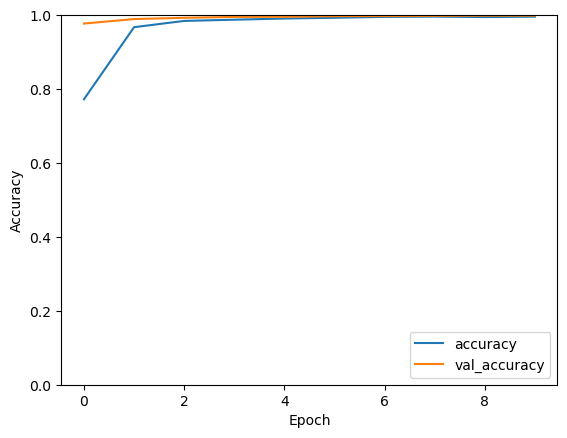

In [41]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Plotting training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

### Accuracy - 0.9985436797142029

## Predicting 

In [88]:
import cv2
import numpy as np

def preprocess_image(img_path):
    # Load the image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found at path: {img_path}")
    img = cv2.resize(img, (28, 28))  # Resize to 28x28
    # Normalize the image to [0, 1] by dividing by 255
    img = img.astype('float32') / 255.0
    # Reshape to add channel dimension (28, 28, 1)
    img = np.expand_dims(img, axis=-1)
    # Add batch dimension (1, 28, 28, 1)
    img = np.expand_dims(img, axis=0)
    
    return img

# Path to your test image
new_image_path = r"C:\Users\shrut\OneDrive\Desktop\digit_dataset2\7\digit_7_1.png"

# Preprocess the new image
preprocessed_image = preprocess_image(new_image_path)

# Predict the digit using the model
prediction = model.predict(preprocessed_image)

# Interpret the prediction
predicted_digit = np.argmax(prediction)

# Display the preprocessed image with the prediction
plt.figure(figsize=(4, 4))
plt.imshow(preprocessed_image[0, :, :, 0], cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}", fontsize=16)
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


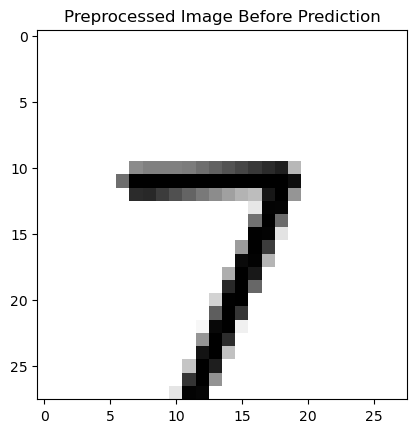

In [89]:
import matplotlib.pyplot as plt

# Visualize the preprocessed image
plt.imshow(preprocessed_image[0, :, :, 0], cmap='gray')
plt.title("Preprocessed Image Prediction")
plt.show()


## quantization

In [52]:
# Function to quantize the image to a given number of levels
def quantize_image(image, num_levels):
    # Compute the quantization factor
    quantization_factor = 255 // num_levels
    
    # Apply quantization
    quantized_image = (image // quantization_factor) * quantization_factor# determines how much each pixel value should be grouped.
    
    return quantized_image

# Quantize the original images (before edge detection)
num_quantization_levels = 8  # Set the number of quantization levels (e.g., 8)
quantized_images = []

for img in images_resized:  # images_resized is your original dataset
    quantized_img = quantize_image(img, num_quantization_levels)
    quantized_images.append(quantized_img)

quantized_images = np.array(quantized_images)

Quantized images shape: (10300, 28, 28)


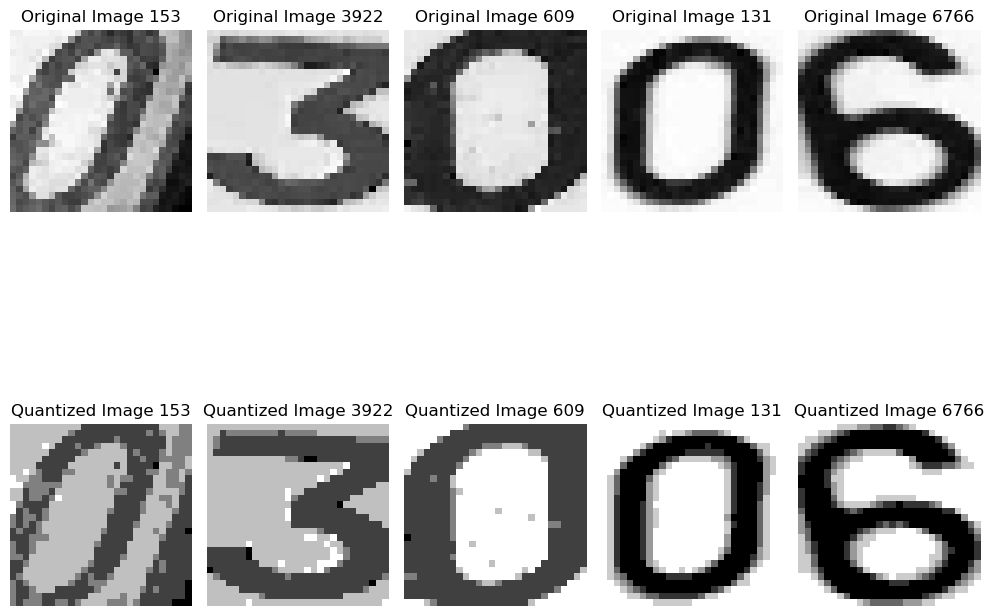

In [53]:
# Print the shape of the quantized images
print("Quantized images shape:", quantized_images.shape)

# Function to visualize the original images vs quantized images
def visualize_images_before_after(original_images, quantized_images, num_images=5):
    # Randomly sample `num_images` from the dataset to display images from different folders
    indices = random.sample(range(len(original_images)), num_images)  # Define indices here
    
    plt.figure(figsize=(10, 2 * num_images))
    
    # Loop through the selected `num_images` and display them
    for i, index in enumerate(indices):
        # Original Image
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original_images[index], cmap='gray')
        plt.title(f"Original Image {index + 1}", fontsize=12)
        plt.axis('off')
        
        # Quantized Image
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(quantized_images[index], cmap='gray')
        plt.title(f"Quantized Image {index + 1}", fontsize=12)
        plt.axis('off')
    
    plt.tight_layout()  # Adjust layout to make sure the images fit well
    plt.show()

# Visualize the first few original images before and after quantization
num_images_to_show = 5  # Change this number to show more or fewer images
visualize_images_before_after(images_resized, quantized_images, num_images=num_images_to_show)

## CNN

In [62]:
# Normalize the quantized images to the range 0-1
quantized_images = quantized_images.astype('float32') / 255.0
labels_flattened = np.argmax(labels, axis=1)  # Convert one-hot labels back to class labels

# One-hot encode the labels for CNN
labels_categorical = to_categorical(labels_flattened, num_classes=10)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(quantized_images, labels_categorical, test_size=0.2, random_state=42)

In [63]:
# Reshape data for CNN input (adding a channel dimension)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)  # Assuming the image size is 28x28
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Verify the shapes
print("X_train shape:", X_train.shape)  # (num_train_samples, 28, 28, 1)
print("y_train shape:", y_train.shape)  # (num_train_samples, 10)
print("X_test shape:", X_test.shape)    # (num_test_samples, 28, 28, 1)
print("y_test shape:", y_test.shape)    # (num_test_samples, 10)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test accuracy:", test_accuracy)

X_train shape: (8240, 28, 28, 1)
y_train shape: (8240, 10)
X_test shape: (2060, 28, 28, 1)
y_test shape: (2060, 10)
Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.0854 - val_loss: 2.3026
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.1337 - loss: 2.2975 - val_accuracy: 0.2917 - val_loss: 2.1750
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5662 - loss: 1.7955 - val_accuracy: 0.8277 - val_loss: 0.7134
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.8529 - loss: 0.5870 - val_accuracy: 0.8777 - val_loss: 0.4158
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8969 - loss: 0.3629 - val_accuracy: 0.9155 - val_loss: 0.3206
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9222 - loss: 0.2850 - val_accuracy: 0.9335 - val_loss: 0.2679
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9377 - loss: 0.2390 - val_accuracy: 0.9417 

#### Accuracy - 0.9577670097351074

## prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


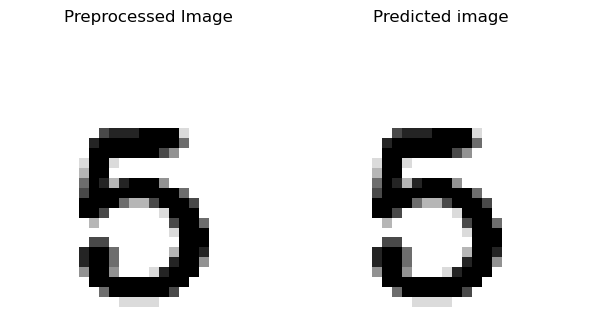

In [99]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Quantization function
def quantize_image(image, num_levels=8):
    quantization_factor = 256 // num_levels
    quantized_image = (image // quantization_factor) * quantization_factor
    return quantized_image

# Preprocessing function
def preprocess_image(img_path, num_levels=8):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found at path: {img_path}")
    img = cv2.resize(img, (28, 28))  # Resize to 28x28
    img = quantize_image(img, num_levels=num_levels)  # Apply quantization
    img = img.astype('float32') / 255.0  # Normalize to [0, 1]
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Prediction function
def predict_digit(model, img_path):
    preprocessed_image = preprocess_image(img_path)
    
    # Visualize the preprocessed image
    plt.figure(figsize=(6,6))
    plt.subplot(1, 2, 1)
    plt.imshow(preprocessed_image[0, :, :, 0], cmap='gray')
    plt.title("Preprocessed Image")
    plt.axis('off')
    
    # Make the prediction
    prediction = model.predict(preprocessed_image)
    predicted_digit = np.argmax(prediction)

    # Show the prediction result
    plt.subplot(1, 2, 2)
    plt.imshow(preprocessed_image[0, :, :, 0], cmap='gray')
    plt.title("Predicted image")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return predicted_digit

# Path to your test image
new_image_path = r"C:\Users\shrut\OneDrive\Desktop\digit_dataset2\5\digit_5_6.png"  # Replace with the correct path to your image

# Predict and visualize the result
predicted_digit = predict_digit(model, new_image_path)
